In [57]:
import math
import numpy as np
import pandas as pd 
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('AirPassengers.csv')
df.head()

,DATE,AIR
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121


In [59]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.tail()

,DATE,AIR
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


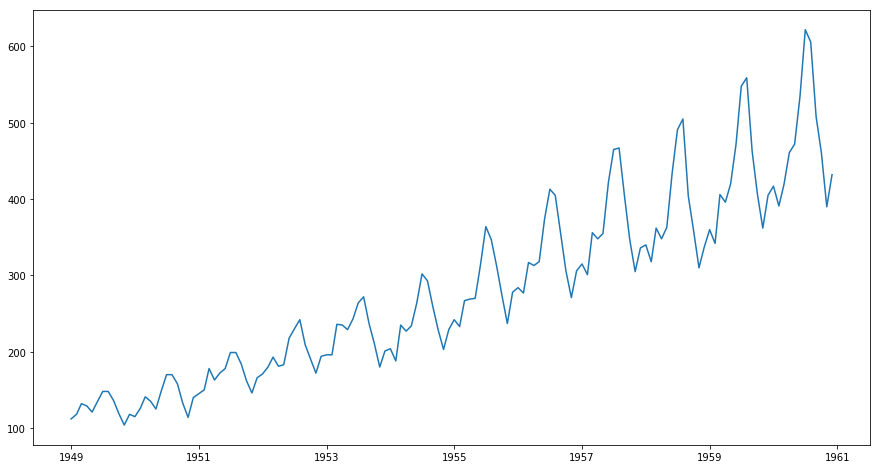

In [61]:
plt.figure(figsize=(15,8))
plt.plot(df['DATE'],df['AIR'])
plt.show()

In [62]:
#Prophet强制要求列名是ds和y
df = df.rename(columns={'DATE':'ds','AIR':'y'})

####  Prophet常用参数
     growth参数用于指定长期趋势的拟合
        linear  线性趋势
        logistic  非线性
     interval_width 预测值的置信区间

### 加法模型

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


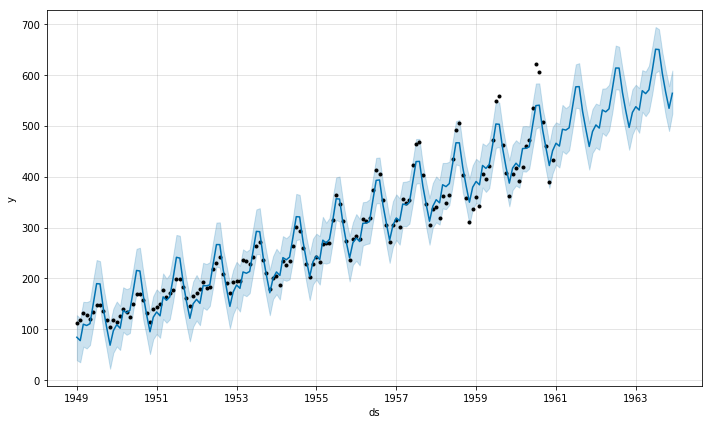

In [63]:
add_model = Prophet(growth='linear',interval_width= 0.95)
add_model.fit(df)
future_date = add_model.make_future_dataframe(periods=36,freq='MS')
forecast = add_model.predict(future_date)
add_model.plot(forecast,uncertainty= True)

#### 趋势性和周期性T(t)、S(t)

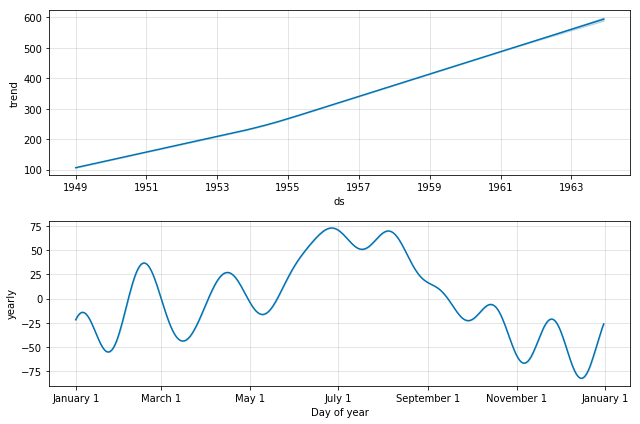

In [64]:
add_model.plot_components(forecast)

### 乘法模型

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


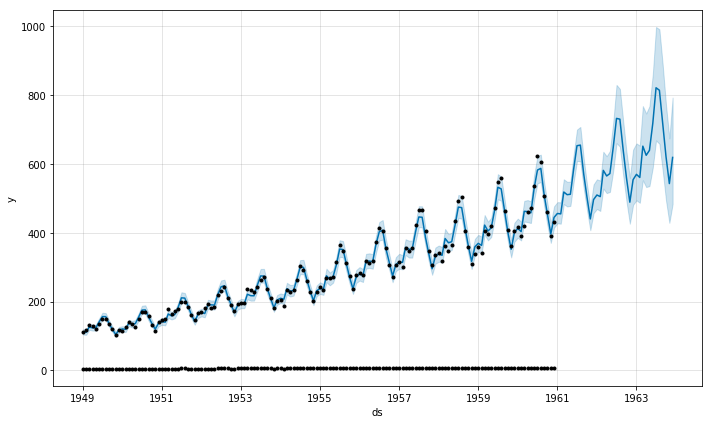

In [66]:
df['y'] = np.log(df['y'])
mult_model = Prophet(growth='linear',interval_width=0.95)
mult_model.fit(df)
future_dates = mult_model.make_future_dataframe(periods=36, freq='MS')
forecast = mult_model.predict(future_dates)
forecast['yhat']=np.power(math.e, forecast['yhat'])
forecast['yhat_lower']=np.power(math.e, forecast['yhat_lower'])
forecast['yhat_upper']=np.power(math.e, forecast['yhat_upper'])
df['y']=np.power(math.e, df['y'])
mult_model.plot(forecast,uncertainty=True)
plt.plot(df['ds'],df['y'],'.k')
plt.show()

### 小彩蛋 预测上证指数

In [67]:
import numpy as np 
import pandas as pd 
from fbprophet import Prophet 
import matplotlib.pyplot as plt
import tushare as ts #tushare财经数据包

#### 获取上证指数 以收盘价为例

In [68]:
de=ts.get_hist_data('sh') #sh指代上证指数
df = pd.DataFrame()
df['y'] = de['open'] #获取收盘价
df['ds'] = list(de.index)
df.sort_index(ascending= True,inplace=True) #正序排列
df['ds'] = pd.to_datetime(df['ds']) #修改日期格式

#### 无参数拟合

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


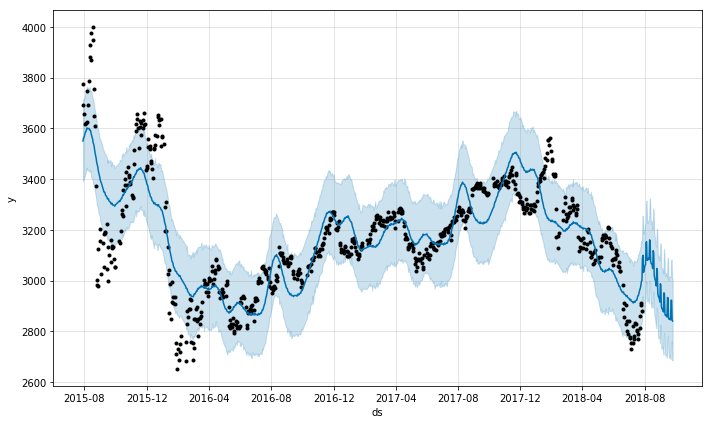

In [75]:
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=60)
forecast = model.predict(future)
model.plot(forecast)
plt.show()

#### 调参

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


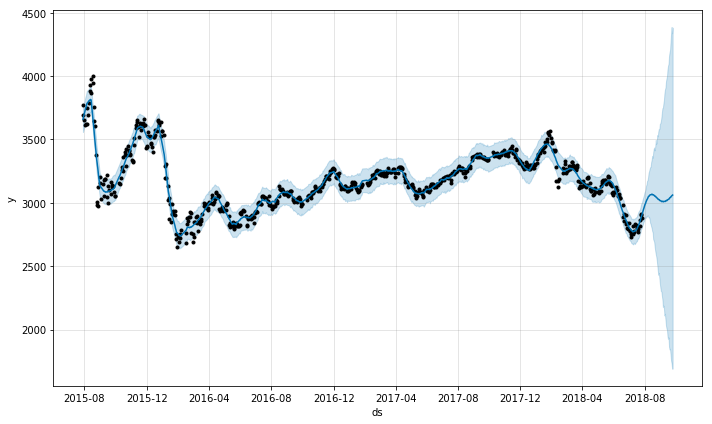

In [73]:
model = Prophet(daily_seasonality= True,weekly_seasonality=True,yearly_seasonality=True,
                growth='linear',n_changepoints=100,changepoint_prior_scale=5,seasonality_prior_scale=0.1,
               interval_width= 0.95)
model.fit(df)
future = model.make_future_dataframe(periods=60)
forecast = model.predict(future)
model.plot(forecast)
plt.show()

#### 至于这个预测的效果嘛 拭目以待 hhh